# Loading the dataset

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import save_model


In [3]:
data_train_path = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
data_test_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test"
data_val_path = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"

# Resizing the images

In [4]:
img_width = 180
img_height = 180

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split =False
    )

Found 3115 files belonging to 36 classes.


In [6]:
print(data_train.class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split =False
    )

Found 351 files belonging to 36 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size = (img_width , img_height),
    batch_size = 32,
    validation_split =False
    )

Found 359 files belonging to 36 classes.


In [9]:
data_class = data_train.class_names
print(len(data_class))

36


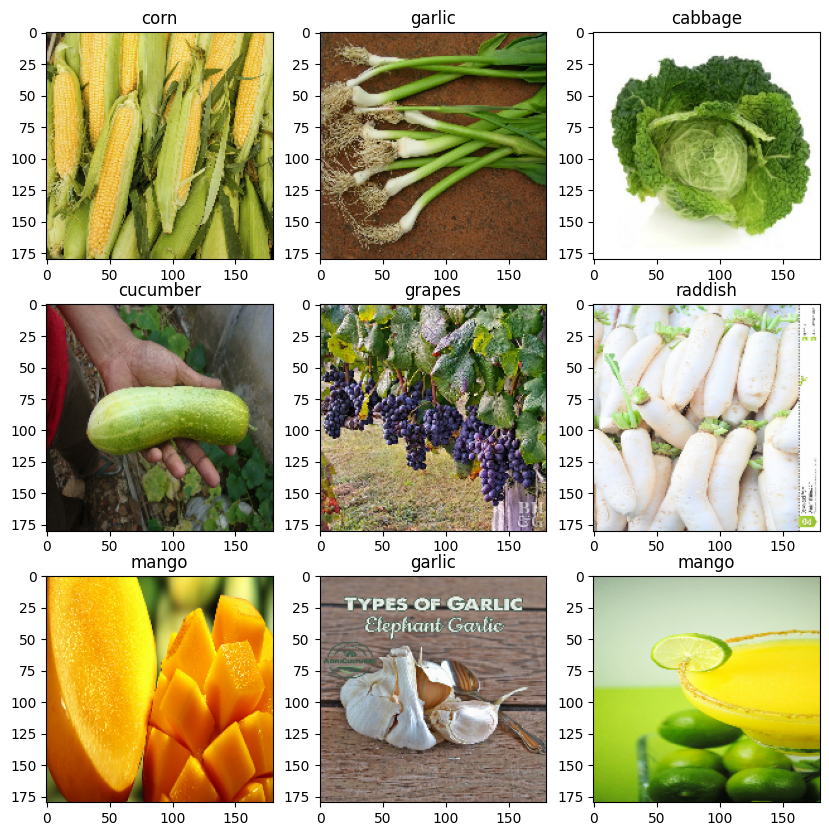

In [10]:
plt.figure(figsize=(10,10))
for image , labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_class[labels[i]])

# Training the model

In [11]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128),
    layers.Dense(len(data_class))
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam' , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
history = model.fit(data_train, validation_data=data_val, epochs=20)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.0506 - loss: 3.5528 - val_accuracy: 0.1538 - val_loss: 2.8682
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 96s 969ms/step - accuracy: 0.1593 - loss: 2.9280 - val_accuracy: 0.3647 - val_loss: 2.2430
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.2710 - loss: 2.4697 - val_accuracy: 0.4473 - val_loss: 1.9173
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.3399 - loss: 2.2083 - val_accuracy: 0.5584 - val_loss: 1.5163
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4265 - loss: 1.9347 - val_accuracy: 0.6382 - val_loss: 1.2329
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 97s 982ms/step - accuracy: 0.4917 - loss: 1.7273 - val_accuracy: 0.7464 - val_loss: 0.9400
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 966ms/step - accuracy: 0.5392 - loss: 1.4961 - val_accuracy: 0.7892 - val_loss: 0.7393
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 95s 964ms/step - accuracy: 0.5987 - loss: 1.3055 - val_accuracy: 0.85

# Testing the model performance

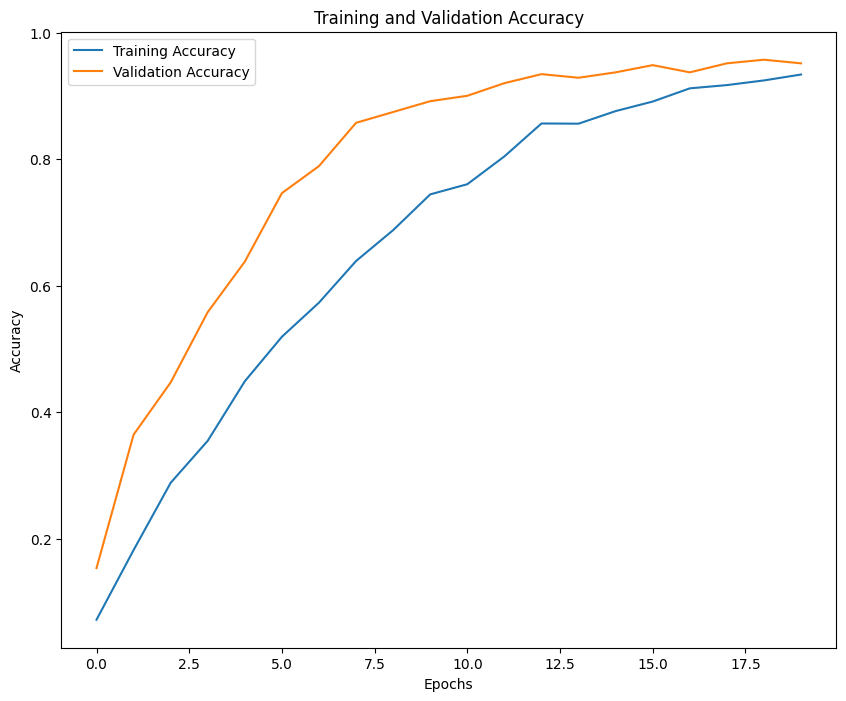

In [15]:
plt.figure(figsize=(10,8))
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

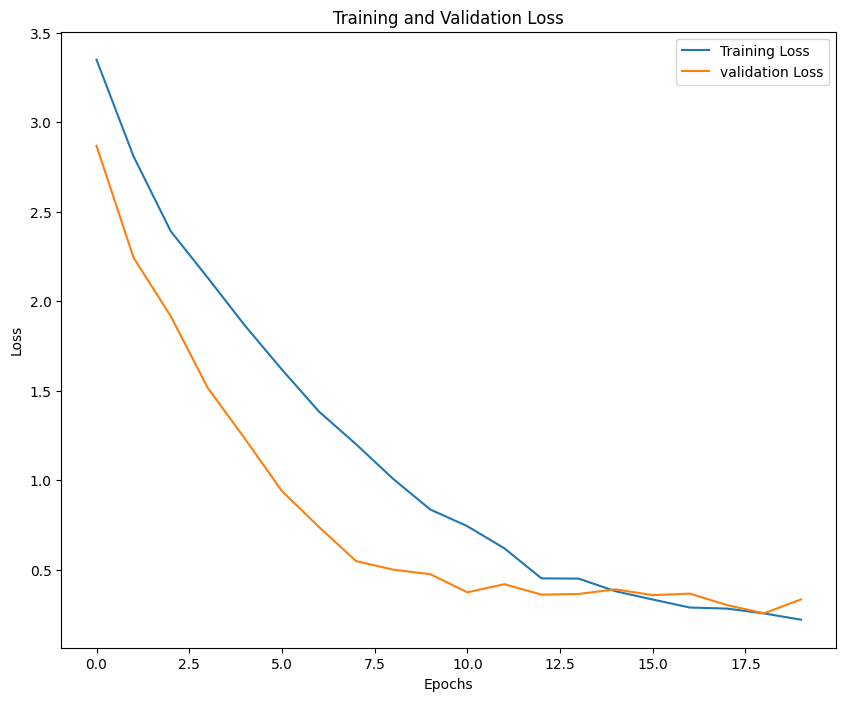

In [16]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [28]:
final_train_acc = history.history["accuracy"][-1] 
final_val_acc = history.history["val_accuracy"][-1]

print(f"Final Training Accuracy: {final_train_acc:.2f}")
print(f"Final Validation Accuracy: {final_val_acc:.2f}")


Final Training Accuracy: 0.93
Final Validation Accuracy: 0.95


## Saving as .h5 for hosting

In [29]:
model.save("model.h5")

In [30]:
model = tf.keras.models.load_model("model.h5")

# Test on a few images
for images, labels in data_test.take(1): 
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    
    print("Predicted Classes:", predicted_classes)
    print("Actual Labels:", labels.numpy())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
Predicted Classes: [11 22 22 17  2 19 26 12 22 21 17 35  9 24 25  3 18 14 20 29 34 29 34 24
 24 17 15 17 12  8  5 27]
Actual Labels: [11 22 22 17  2 19 26 12 22 21 17 35  9 24 25  3 18  1 20 29  0 29 34 24
 24 17 15 17 12  8  5 27]
